<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [9]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [10]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [11]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [12]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

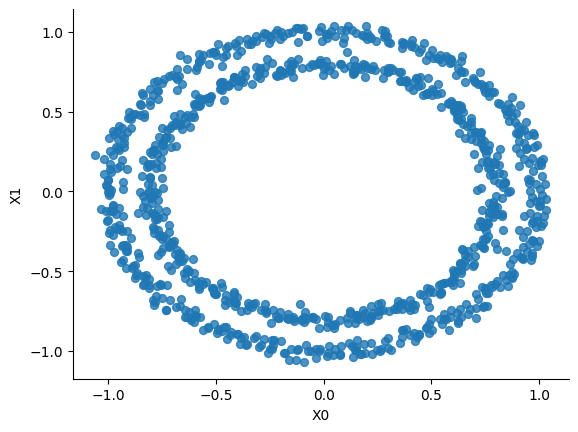

In [14]:
from matplotlib import pyplot as plt
circles.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

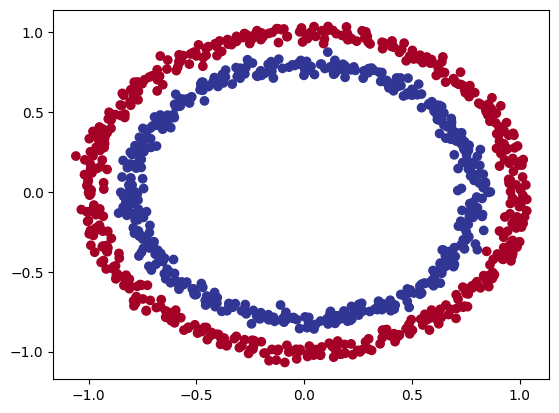

In [15]:
 # Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [16]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [17]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [18]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [19]:
import tensorflow as tf

In [20]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.6737 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8583 - accuracy: 0.4740
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.3953 - accuracy: 0.5140
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8445 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7203 - accuracy: 0.4960


In [21]:
# Let's try and improve our model by training longer...
model.fit(X, y, epochs=200, verbose=0)

In [22]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [24]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932473182678223, 0.5]

In [25]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [26]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [27]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4960


[0.6934579610824585, 0.4959999918937683]

to visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as align between zones (where each unique class falls).

In [28]:
import numpy as np

In [29]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  X_min, X_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


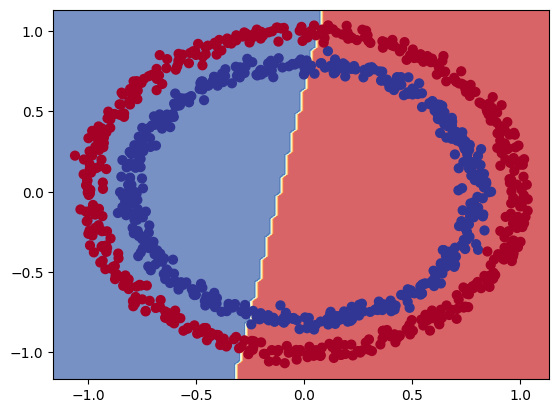

In [30]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [31]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(199, 1199, 5) #  y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [32]:
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
#model_4.fit(X_reg_train, y_reg_train, epochs=100)

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 436.9619 - mae: 436.9619
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 335.2281 - mae: 335.2281
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 234.9647 - mae: 234.9647
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 128.6557 - mae: 128.6557
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 89.8665 - mae: 89.8665
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 115.8192 - mae: 115.8192
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 109.8387 - mae: 109.8387
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 89.9476 - mae: 89.9476
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 84.8315 - mae: 84.8315
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 89.8236 - mae: 89.8236
Epoch 11/100
5/5 [=============================

2/2 [==============================] - 0s 8ms/step


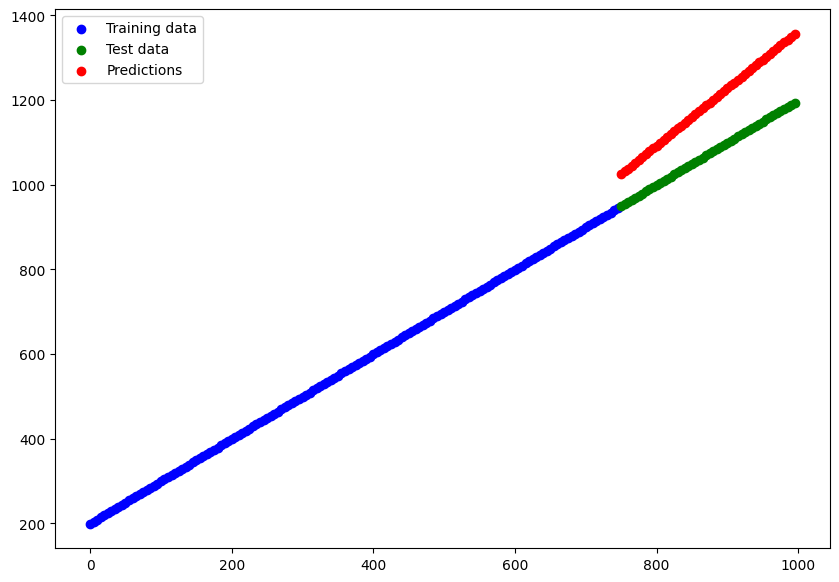

In [33]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [34]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 4.2966 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1392 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0183 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8817 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7777 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 3.6679 - accuracy: 0.4670
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.5394 - accuracy: 0.4500
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.3863 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1648 - accuracy: 0.4370
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 2.9033 - accuracy: 0.4260
Epoch 11/

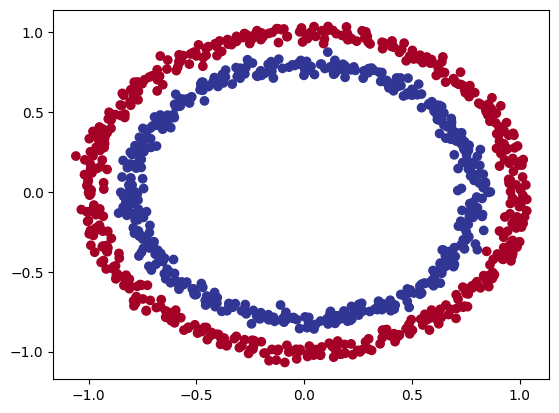

In [35]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classification


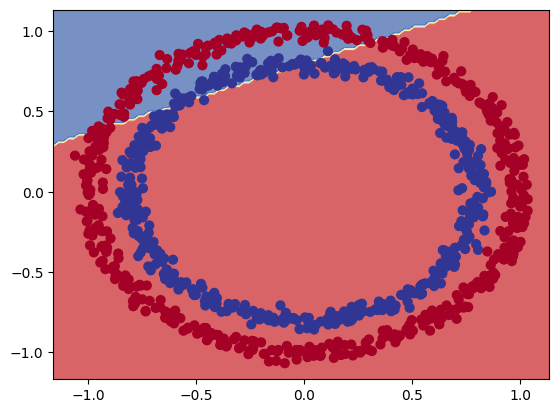

In [36]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# Fit the model
history = model_6.fit(X, y, epochs=100 )

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7885 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7714 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7568 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7535 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7504 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6671 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5847 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5765 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5631 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5514 - accuracy: 0.4800
Epoch 11/

In [38]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 4ms/step - loss: 3.5943 - accuracy: 0.4740
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 3.2054 - accuracy: 0.4690
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 3.0471 - accuracy: 0.4660
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 2.8783 - accuracy: 0.4620
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 2.7501 - accuracy: 0.4560
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 2.6666 - accuracy: 0.4560
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 2.6036 - accuracy: 0.4560
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 2.3815 - accuracy: 0.4490
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 2.0043 - accuracy: 0.4410
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 1.8421 - accuracy: 0.4380
Epoch 11/

In [39]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4280


[0.7033227682113647, 0.42800000309944153]

313/313 [==============================] - 1s 1ms/step
doing binary classification


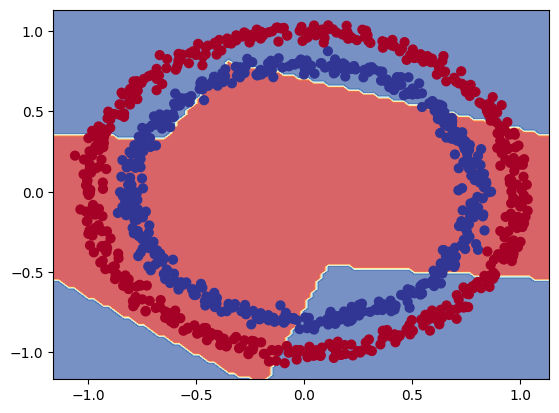

In [40]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

In [41]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7019 - accuracy: 0.4930
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5170
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5190
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5150
Epoch 11/

In [42]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.0315 - accuracy: 0.9970


[0.03149741142988205, 0.996999979019165]

313/313 [==============================] - 1s 4ms/step
doing binary classification


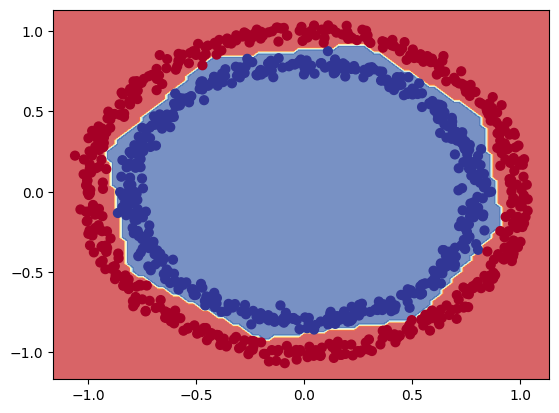

In [43]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_8, X, y)

In [44]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

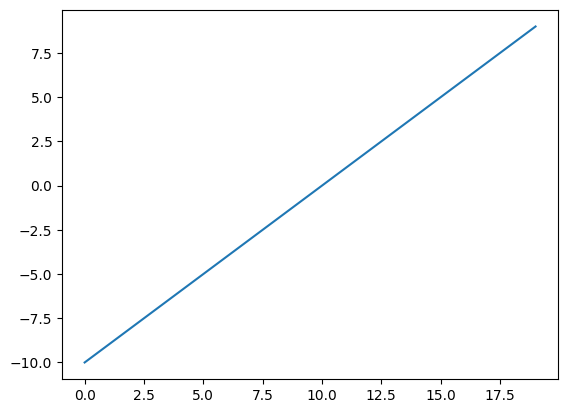

In [45]:
# Visualize our toy tensor
plt.plot(A);

In [46]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

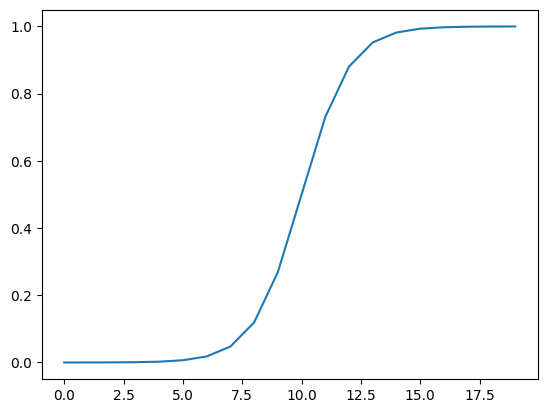

In [47]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [48]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

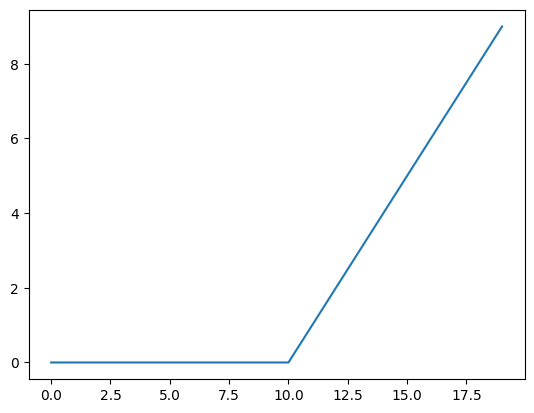

In [49]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [50]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

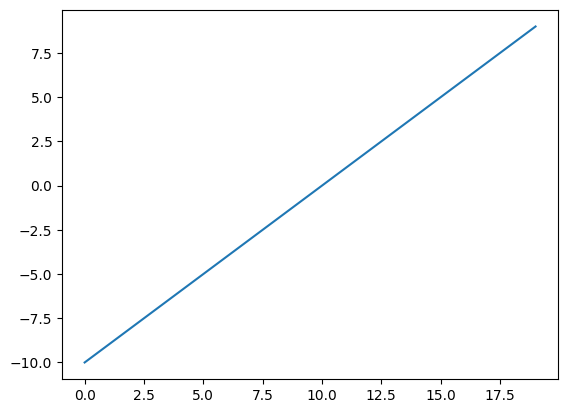

In [51]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [52]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [53]:
# Check how many examples we have
len(X)

1000

In [54]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [55]:
# Let's recreate a model to fit the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 7ms/step - loss: 0.6952 - accuracy: 0.4900
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5288
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5263
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5275
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5337
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5312
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.6162
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6125
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.5938
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.6350
Epoch 11/50
25/25 [

In [56]:
# Evaluate
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9850


[0.11691416054964066, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


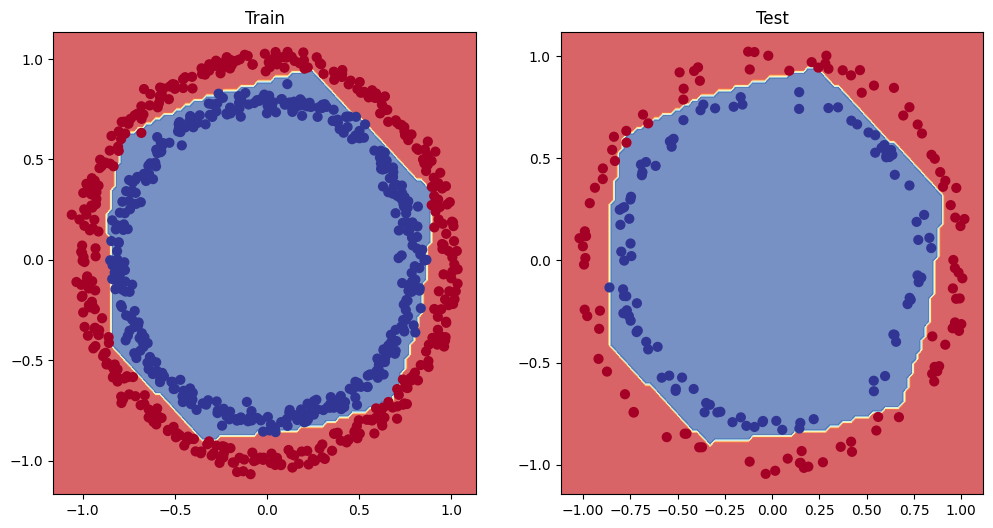

In [57]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # We want to create a subplot, 1row, 2col, 1st value will be the training plot
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)  # We want a second subplot, it is going to be "Test"
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [58]:
history.history

{'loss': [0.6951680183410645,
  0.6855438351631165,
  0.6843193173408508,
  0.6822033524513245,
  0.6804578900337219,
  0.6766276359558105,
  0.6690183281898499,
  0.6632642149925232,
  0.6560930013656616,
  0.6476569175720215,
  0.6384212970733643,
  0.6267188191413879,
  0.6052494645118713,
  0.5738680958747864,
  0.5446817278862,
  0.5183666348457336,
  0.4972844421863556,
  0.48052978515625,
  0.4559905230998993,
  0.43853333592414856,
  0.41905978322029114,
  0.40454983711242676,
  0.38974520564079285,
  0.37754571437835693,
  0.3695124387741089,
  0.3545270562171936,
  0.34590378403663635,
  0.33727166056632996,
  0.32554924488067627,
  0.31626883149147034,
  0.31497371196746826,
  0.30422309041023254,
  0.29966679215431213,
  0.2838461995124817,
  0.2741011381149292,
  0.2689044177532196,
  0.2548536956310272,
  0.22969339787960052,
  0.21280349791049957,
  0.20592600107192993,
  0.18478582799434662,
  0.1771056205034256,
  0.17373894155025482,
  0.16890841722488403,
  0.1597717

In [59]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.695168,0.49000
1,0.685544,0.52875
2,0.684319,0.52625
3,0.682203,0.52750
4,0.680458,0.53375
5,0.676628,0.53125
6,0.669018,0.61625
7,0.663264,0.61250
8,0.656093,0.59375
9,0.647657,0.63500


Text(0.5, 1.0, 'Model_8 loss curves')

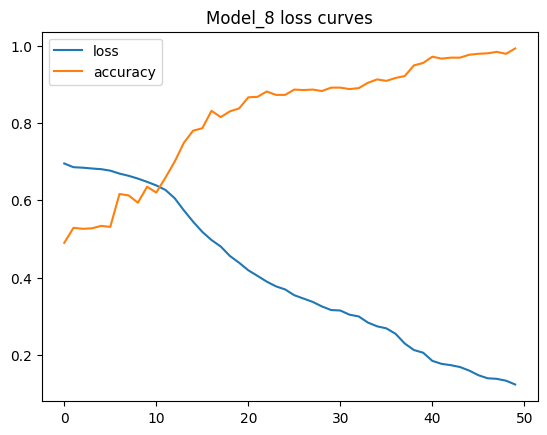

In [60]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [61]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7045 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.4913 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4900 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7030 - accuracy: 0.4837 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7027 - accuracy: 0.4775 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.4737 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.4638 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<Axes: xlabel='epochs'>

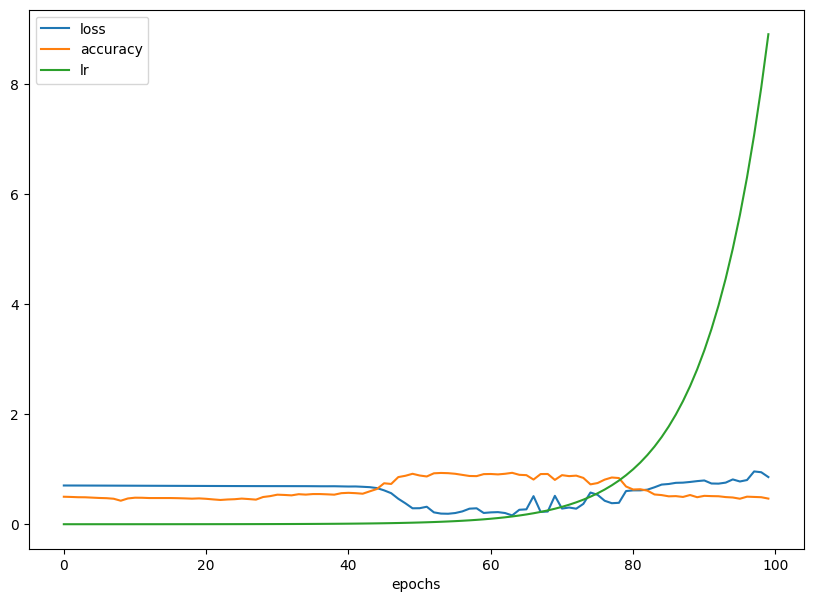

In [62]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

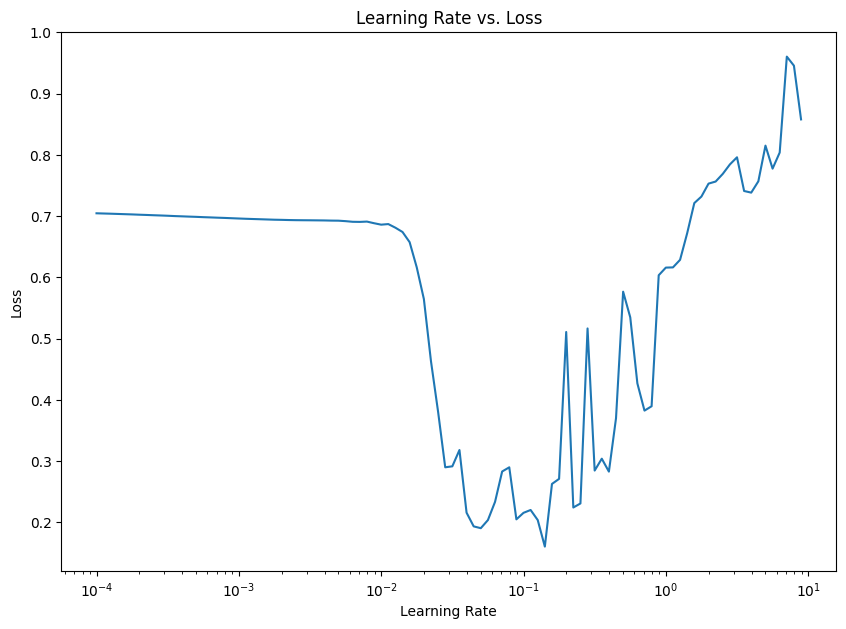

In [63]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])  # log on x scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [64]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [65]:
# Let's try using a higher *ideal* learning rate with the same model as before.

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6954 - accuracy: 0.4775
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5325
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5625
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.5625
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6438
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7287
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3030 - accuracy: 0.9600
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2149 - accuracy: 0.9787
Epoch 11/20
25/25 [

In [66]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0439 - accuracy: 0.9950


[0.04387699440121651, 0.9950000047683716]

In [67]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9850


[0.11691416054964066, 0.9850000143051147]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


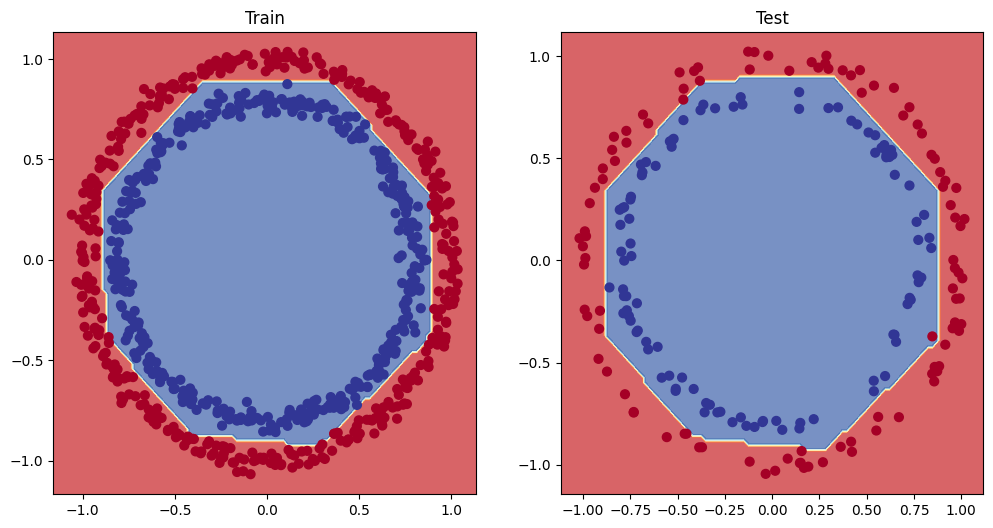

In [68]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1,)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification ewaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)


In [69]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9950
Model loss on the test set: 0.04387699440121651
Model accuracy on the test set: 99.50%


How about a confusion matrix?

In [70]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [71]:
dy_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [72]:
hy_preds[:10]

array([[0.941502  ],
       [0.99906886],
       [0.97400475],
       [0.99542284],
       [0.11663631],
       [0.00214515],
       [0.9227381 ],
       [0.05785139],
       [0.99846065],
       [0.04165871]], dtype=float32)

Looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [73]:
# Convert prediction probabilities to binary format and view the first 10

y_roundpreds = tf.round(y_preds)
y_roundpreds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [74]:
# Create a confusion matrix
confusion_matrix(y_test, y_roundpreds)

array([[100,   1],
       [  0,  99]])

How about we prettify our confusion matrix?

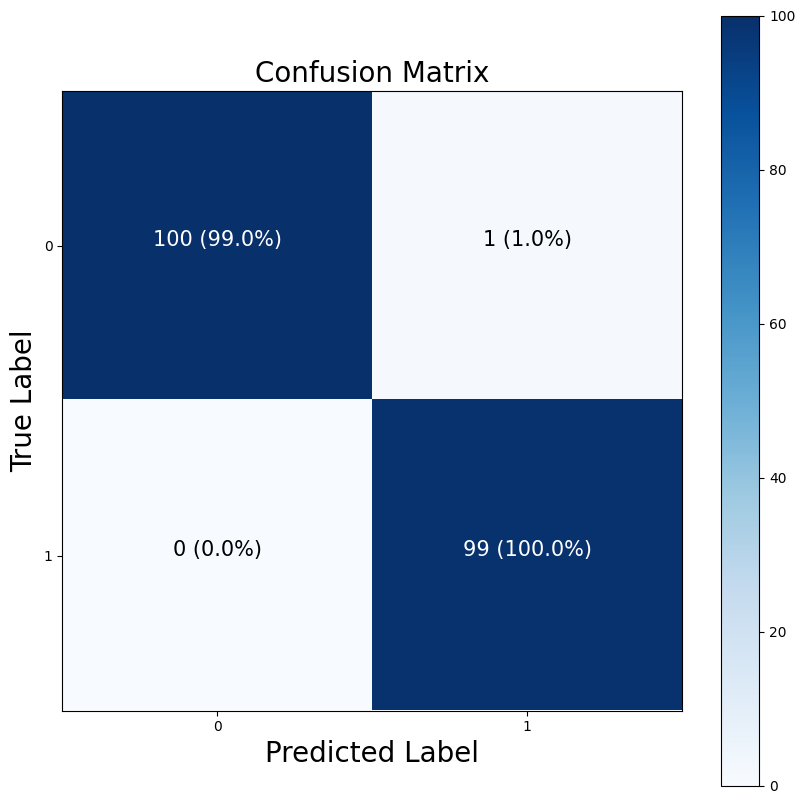

In [75]:
# the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_roundpreds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set treshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [78]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted in training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [79]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [81]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

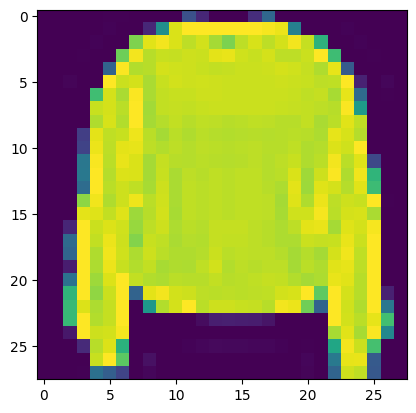

In [86]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [87]:
# Check out samples label
train_labels[7]

2

In [88]:
# Create a small list so we can index our training labels so they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

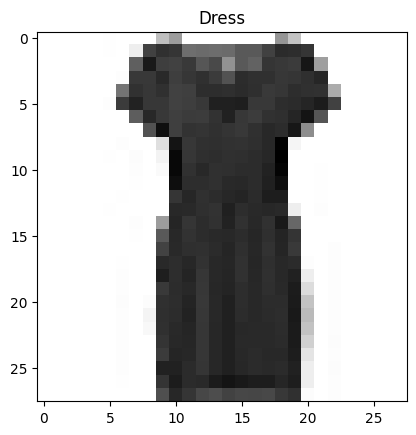

In [90]:
# Plot an example image and its label
index_of_choice =
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)  # cm is colormapping / binary means greyscaled
plt.title(class_names[train_labels[index_of_choice ]])

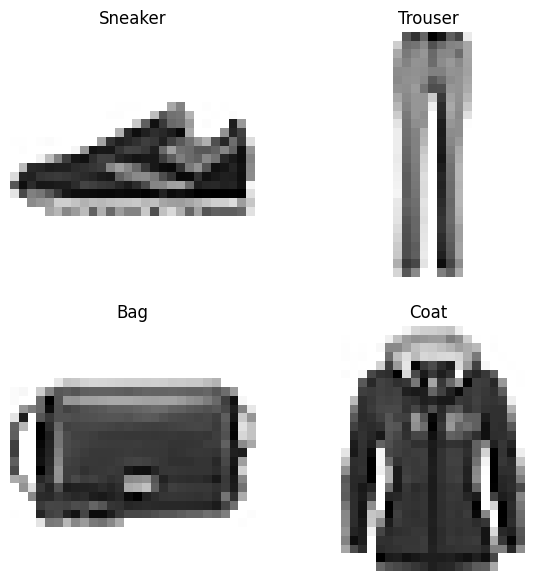

In [113]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)